In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
data = pd.read_csv("/content/drive/MyDrive/ml_datasets/twitter_sentiment_dataset/train.csv")
data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


0    29720
1     2242
Name: label, dtype: int64


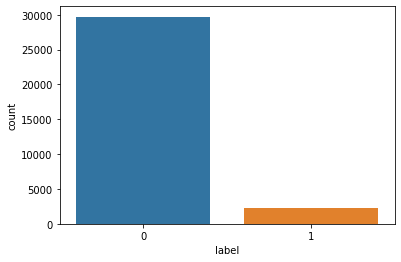

In [4]:
print(data['label'].value_counts())
sns.countplot(data = data, x= 'label')
plt.show()

In [5]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [7]:
wordnet = WordNetLemmatizer()
def clean_tweets(df):
  tempArr = []
  for lines in df:
    tweet = re.sub(r"[^a-zA-Z]+", ' ', lines)
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [wordnet.lemmatize(word) for word in tweet if not word in set(stopwords.words('english'))]
    if len(tweet) == 0:
      # if all the words im tweet are stopwords then
      tweet = 'I'
    else:
      tweet = ' '.join(tweet)
    tweet
    tempArr.append(tweet)
  return tempArr

In [8]:
cleaned_tweets = clean_tweets(data['tweet']) 
cleaned_tweet = pd.DataFrame(cleaned_tweets, columns = ['cleaned_tweets'])
cleaned_tweet

,cleaned_tweets
0,user father dysfunctional selfish drag kid dys...
1,user user thanks lyft credit use cause offer w...
2,bihday majesty
3,model love u take u time ur
4,factsguide society motivation
...,...
31957,ate user isz youuu
31958,see nina turner airwave trying wrap mantle gen...
31959,listening sad song monday morning otw work sad
31960,user sikh temple vandalised calgary wso condem...


In [9]:
data = pd.concat([data, cleaned_tweet], axis=1)
data.head()

,id,label,tweet,cleaned_tweets
0,1,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drag kid dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit use cause offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation


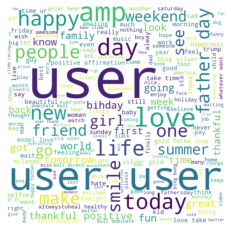

In [10]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
words = ' '.join([tweets for tweets in data['cleaned_tweets']])
wordcloud = WordCloud(width = 1000, height = 1000, random_state=1, background_color='white', ).generate(words)
# Plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
words = words.split()

In [12]:
from collections import Counter
word_count = Counter(words)
word_count.most_common()
len(word_count)

35129

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=2500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(cleaned_tweets).toarray()

In [14]:
X.shape

(31962, 2500)

In [15]:
X = pd.DataFrame(data=X)
print(X.shape)
X

(31962, 2500)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.330485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.387116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
tfidfconverter.vocabulary_

{'user': 2327,
 'father': 760,
 'selfish': 1926,
 'kid': 1190,
 'run': 1877,
 'thanks': 2203,
 'credit': 496,
 'use': 2323,
 'cause': 355,
 'offer': 1538,
 'bihday': 213,
 'model': 1434,
 'love': 1318,
 'take': 2161,
 'time': 2226,
 'ur': 2319,
 'society': 2033,
 'motivation': 1449,
 'huge': 1065,
 'fan': 751,
 'big': 207,
 'talking': 2167,
 'leave': 1250,
 'pay': 1602,
 'get': 898,
 'camping': 334,
 'tomorrow': 2237,
 'next': 1503,
 'school': 1902,
 'year': 2478,
 'exam': 714,
 'think': 2210,
 'hate': 991,
 'imagine': 1094,
 'girl': 906,
 'land': 1218,
 'cavs': 357,
 'champion': 366,
 'cleveland': 406,
 'welcome': 2405,
 'ireland': 1145,
 'consumer': 461,
 'price': 1706,
 'index': 1103,
 'mom': 1435,
 'previous': 1705,
 'may': 1380,
 'blog': 240,
 'silver': 1986,
 'gold': 918,
 'forex': 837,
 'orlando': 1566,
 'orlandoshooting': 1568,
 'heabreaking': 997,
 'value': 2331,
 'see': 1917,
 'daddy': 519,
 'today': 2231,
 'day': 533,
 'cnn': 417,
 'call': 326,
 'middle': 1409,
 'build': 305

In [17]:
y = data['label']

In [22]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(ratio=0.9)
X_ros, y_ros = os.fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [23]:
X_ros.shape, y_ros.shape

((56468, 2500), (56468,))

In [24]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_ros)))

Original dataset shape Counter({0: 29720, 1: 2242})
Resampled dataset shape Counter({0: 29720, 1: 26748})


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state=1, test_size=0.25)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [28]:
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=0)  
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [30]:
y_pred = random_forest_clf.predict(X_test)

In [31]:
confusion_matrix(y_test, y_pred)

array([[7334,  202],
       [  25, 6556]])

In [32]:
accuracy_score(y_test, y_pred)

0.9839200963377488

In [58]:
from sklearn.naive_bayes import MultinomialNB

In [59]:
multinomialnb = MultinomialNB().fit(X_train, y_train)

In [60]:
y_predicted_nb = multinomialnb.predict(X_test)

In [61]:
confusion_matrix(y_test, y_predicted_nb)

array([[6780,  756],
       [ 616, 5965]])

In [62]:
accuracy_score(y_test, y_predicted_nb)

0.9028122122263937

## HyperParameter tuning of multinomial nb

In [44]:
from sklearn.model_selection import GridSearchCV

In [53]:
grid_params = {
  'alpha': np.linspace(0.5, 1.5, 6),
  'fit_prior': [True, False],  
}

In [54]:
nb_tuning = GridSearchCV(multinomialnb, grid_params, n_jobs=-1, cv=5, verbose=2)

In [55]:
nb_tuning.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5]),
                         'fit_prior': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [56]:
nb_tuning.best_score_

0.9014898555903696

In [38]:
from xgboost import XGBClassifier

In [39]:
xgb_clf = XGBClassifier().fit(X_train, y_train)

In [40]:
y_predicted_xbg = xgb_clf.predict(X_test)

In [41]:
confusion_matrix(y_test, y_predicted_xbg)

array([[7161,  375],
       [2566, 4015]])

In [42]:
accuracy_score(y_test, y_predicted_xbg)

0.7916696181908337

In [57]:
file_name_pkl = "/content/drive/MyDrive/ml/twitter_model/random_forest.pkl"
with open(file_name_pkl, 'wb') as file:  
    pickle.dump(random_forest_clf, file)

In [63]:
file_name_pkl = "/content/drive/MyDrive/ml/twitter_model/mutlinomial_nb.pkl"
with open(file_name_pkl, 'wb') as file:  
    pickle.dump(multinomialnb, file)

In [64]:
file_name_pkl = "/content/drive/MyDrive/ml/twitter_model/xbg_clf.pkl"
with open(file_name_pkl, 'wb') as file:  
    pickle.dump(xgb_clf, file)